# 📚 Exercise Session - Week 3: Understanding Recurrent Neural Networks
**Main Topics**: Backpropagation, vanishing gradients, LSTMs, Seq2seq Translation, S2S + Attention


 1. [**TASK A:** RNN for Sentiment Analysis](#task-a-rnn-for-sentiment-analysis)
- Train a recurrent neural network model using PyTorch
- Use it to classify the same sentiment analysis dataset as before

2. [**TASK B:** Machine Translation with Attention ](#task-b-machine-translation-with-attention)
- Use RNN with attention for machine translation
- Look at attention over tokens in the input encoder
- What are the highest weighted components in the input?

> **By the end of the session you will be able to:**
> - ✅  Train a recurrent neural network model using PyTorch
> - ✅  Apply RNN models for classification and Seq2Seq generation tasks
> - ✅  Understand attention mechanism within RNN architecture
> - ✅  Be more interested in NLP 😉

<div style="padding:8px 0 8px 15px;border-left:3px solid orange">
    <h3>Goal of today's exercise</h3><br/>

In this exercise session, We will go through the RNN architecture and the attention mechanism. You will implement RNN-based model on both classification (i.e. sentiment analysis) and sequence-to-sequence generation (i.e. machine translation) tasks during the session.

You will need to fill in all the missing pieces of code. For each one, you will be given a 🎯 `Goal` guidance that explains the steps you need to implement and an 💻 `API` reference with the functions or classes you can use to achieve each goal.

#### Setup
Please check the [setup guide]() as in Exercise 1 of the course before you start.

#### Reference
- **Pytorch** will be the main deep learning framework used in this and following exercises/assignments. If you are new to Pytorch, [this tutorial](https://pytorch.org/tutorials/) is highly recommended :)

</div>

## RNN: Recurrent Neural Network

Generally, RNN (Recurrent Neural Network) aims to model the temporal relationship between sequantial nodes (tokens in natural language processing). It would inherit previous output as part of the input for the next prediction.

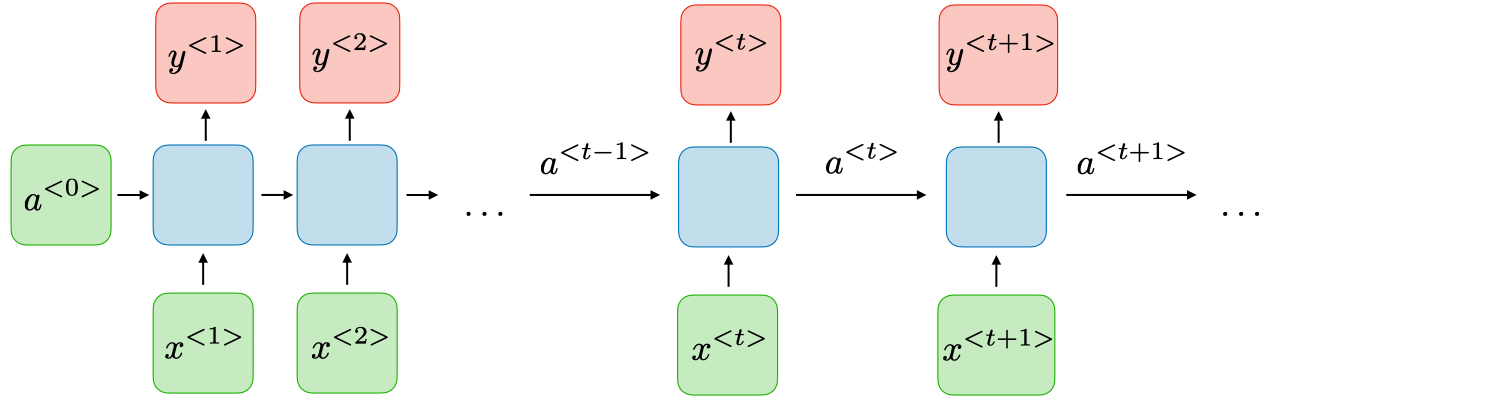

$x^{(<t>)}, y^{(<t>)}, a^{(<t>)}$ are the input, output, hidden state at each time step $t$, relatively.

For a detailed mathematical formulation, we have:
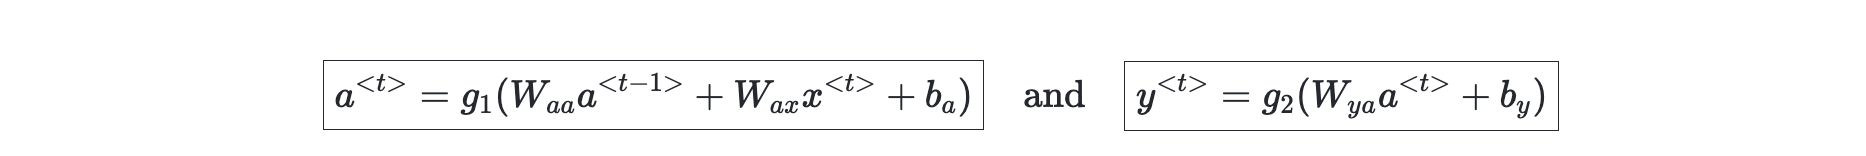

### RNN Applications
According to the applications, RNN can be adapted to a variety of tasks with different input-output relations. For example:
- One-to-Many (`Length(x)=1 << Length(y)`) :  **Music Generation**
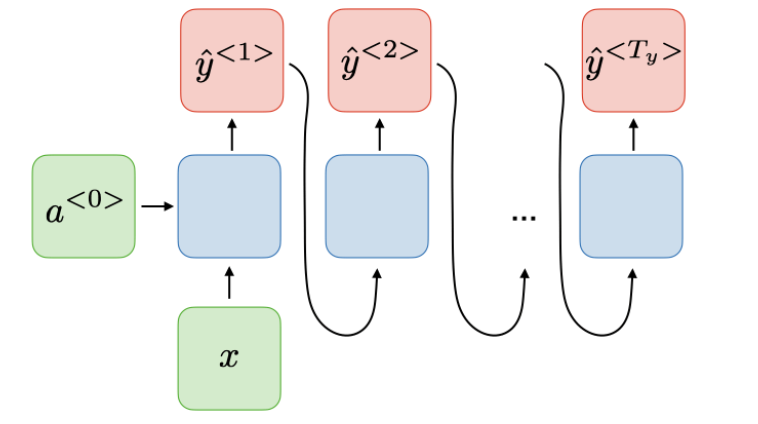

- Many-to-One (`Length(x) >> Length(y)=1`) :  **Sentiment Classification**
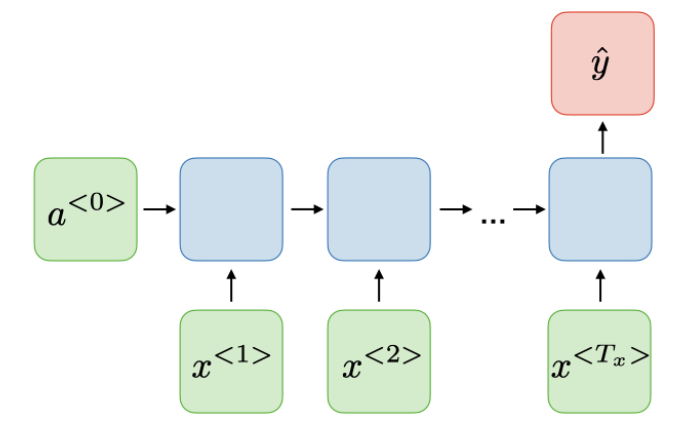

- Many-to-Many (`Length(x) = Length(y) >> 1`) :  **Name Entity Recognition**
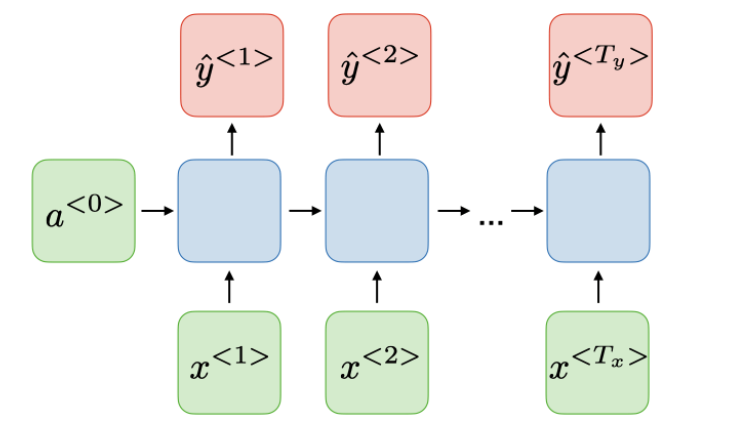

- Many-to-Many (`Length(x)` $\neq$ `Length(y)`) :  **Machine Translation**
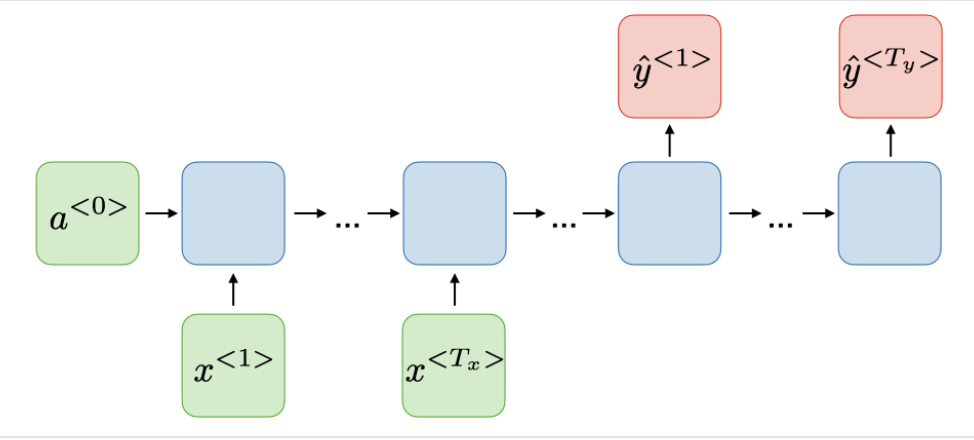


Next, we will see and play with some real dataset in sentiment analysis and machine translation tasks using RNN-based models.

## Task A. RNN for Sentiment Analysis

In this part, you will implement a basic RNN model using [Pytorch](https://pytorch.org/) for sentiment analysis, a binary classification task.

In [1]:
!pip install datasets

In [2]:
# import dependencies
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
%matplotlib inline

# Set the random seed for reproducible results
torch.manual_seed(0)

/home/laz4rz/miniconda3/envs/mnlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Dataset Preparation

We will use the same IMDB review dataset as in Exercise 1 for sentiment classification.

We will download the dataset from the HuggingFace datasets library.  
<!-- - You can download the dataset from [here](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download).
- Save as `.csv` file into `IMDB_DATA_PATH`. -->

In [3]:
imdb_data = load_dataset("imdb")

In [4]:
import random
import re

def preview_random_content(index=None):
  if index is None:
    index = random.randint(0, len(imdb_data["train"]))

  sample = imdb_data['train'][index]

  print(f"Review: {sample['text']}")
  print(f"Label: {sample['label']}")
  return sample["text"]

sample_review = preview_random_content(index=9207)

while True:
  if "http" in (review := preview_random_content()):
    print(">> Found")
    print(review)
    print(re.sub("http\S*", "", review))
    break

Review: I think this is probably one of the worst movies I've watched in a long time.<br /><br />Trying to get the 'same characters' with different people is *such* a bad idea. If they couldn't get Sara Michelle G. and Ryan P. in this one, they should have just cut their losses and said to heck with it. Instead they get NEW actors that are horrible at what they did. I seriously felt like I was at a High School or (bad) College play with the lever of acting these people put forth.<br /><br />Where do they get some of these people? Was this their first movie? It sure seemed like it.<br /><br />This movie also parallels the original in a few lines of speech. I had just got done watching the first one and popped #2 in. I was all excited to get to watch the second one and it ended up being the worst show I've seen in a while. I don't hardly EVER *EVER* turn off a movie, but this one definitely went off after about 30 - 40 min.
Label: 0
Review: The mere fact that I still think of the movie a

## Preprocessing
- 🎯 **Goal:** Implement the `imdb_preprocess()` function to clean the texts. For removing some special tokens (e.g. HTML or urls), you will need design some regular formats with `re` package; with word tokenization, you can find some useful functions on-the-shelf from `nltk` toolkit.

- 💻  **API:** You can refer to [`nltk documentation`](https://www.nltk.org/) for more details.

In [5]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /home/laz4rz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/laz4rz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
re.sub("<([^>]*)>", " ", sample_review)


"I think this is probably one of the worst movies I've watched in a long time.  Trying to get the 'same characters' with different people is *such* a bad idea. If they couldn't get Sara Michelle G. and Ryan P. in this one, they should have just cut their losses and said to heck with it. Instead they get NEW actors that are horrible at what they did. I seriously felt like I was at a High School or (bad) College play with the lever of acting these people put forth.  Where do they get some of these people? Was this their first movie? It sure seemed like it.  This movie also parallels the original in a few lines of speech. I had just got done watching the first one and popped #2 in. I was all excited to get to watch the second one and it ended up being the worst show I've seen in a while. I don't hardly EVER *EVER* turn off a movie, but this one definitely went off after about 30 - 40 min."

In [7]:
## TODO: Complete `imdb_preprocess` function following instructions ##
def imdb_preprocess(review):
    """
    Takes in a string of review, then performs the following:
    1. Remove HTML tag from review
    2. Remove URLs from review
    3. Make entire review lowercase
    4. Split the review in words
    5. Remove all punctuation
    6. Remove empty strings from review
    7. Remove all stopwords
    8. Returns a list of the cleaned review after joining them back to a sentence
    """
    # 1. Removing HTML tag from review
    review_without_tag = re.sub("<([^>]*)>", " ", review)
    
    # 2. Removing URLs
    review_without_tag_and_url = re.sub("http\S*", "", review_without_tag)

    # 3. Make entire string lowercase
    review_lowercase = review_without_tag_and_url.lower()

    # 4. Split string into words (tips: using `word_tokenize` function in nltk!)
    tokenized_words = word_tokenize(review_lowercase)
    
    # 5. Remove punctuation
    list_of_words_without_punctuation=[''.join(this_char for this_char in this_string if (this_char in string.ascii_lowercase))for this_string in tokenized_words]
     
    # 6. Remove empty strings
    list_of_words_without_punctuation = list(filter(None, list_of_words_without_punctuation))
    
    # 7. Remove stopwords
    #    - Get English Stopwords from WordNet (check nltk again!)
    #    - Filter the words in `en_stops` out
    en_stops = stopwords.words('english')
    filtered_word_list = [word for word in list_of_words_without_punctuation if word not in en_stops]

    # 8. Returns a list of the cleaned review after jioning them back to a sentence
    return ' '.join(filtered_word_list)

In [8]:
# TEST: preview the review after preprocessing #
print(sample_review)
imdb_preprocess(sample_review)

I think this is probably one of the worst movies I've watched in a long time.<br /><br />Trying to get the 'same characters' with different people is *such* a bad idea. If they couldn't get Sara Michelle G. and Ryan P. in this one, they should have just cut their losses and said to heck with it. Instead they get NEW actors that are horrible at what they did. I seriously felt like I was at a High School or (bad) College play with the lever of acting these people put forth.<br /><br />Where do they get some of these people? Was this their first movie? It sure seemed like it.<br /><br />This movie also parallels the original in a few lines of speech. I had just got done watching the first one and popped #2 in. I was all excited to get to watch the second one and it ended up being the worst show I've seen in a while. I don't hardly EVER *EVER* turn off a movie, but this one definitely went off after about 30 - 40 min.


'think probably one worst movies watched long time trying get characters different people bad idea could nt get sara michelle g ryan p one cut losses said heck instead get new actors horrible seriously felt like high school bad college play lever acting people put forth get people first movie sure seemed like movie also parallels original lines speech got done watching first one popped excited get watch second one ended worst show seen nt hardly ever ever turn movie one definitely went min'

#### Build Vocabulary
- Indexing each unique word in the dataset

In [9]:
from tqdm import tqdm

def build_vocab(vocab, review_list):
    """
    Reading train test directory
    """
    for review in tqdm(review_list):
      clean_review=imdb_preprocess(review)
      vocab.update(clean_review.split())
    return vocab

In [10]:
from collections import Counter
vocab = Counter()
vocab = build_vocab(vocab, imdb_data["train"]["text"])

100%|██████████| 25000/25000 [00:51<00:00, 489.80it/s]


In [11]:
# rank tokens in vocab by frequency
ranked_vocab_list = sorted(vocab.items(), key=lambda x: x[1], reverse=True)
print(vocab.most_common(10))
# print top-10 most frequent tokens
print(ranked_vocab_list[:10])

# get token2idx mapping as vocab_dict
token2idx = {w:i+1 for i, (w,f) in enumerate(ranked_vocab_list)}

print('Size of Vocab: ', len(token2idx))

[('movie', 43398), ('film', 39511), ('nt', 33455), ('one', 26102), ('like', 19796), ('good', 14813), ('would', 13398), ('even', 12618), ('time', 12223), ('story', 11790)]
[('movie', 43398), ('film', 39511), ('nt', 33455), ('one', 26102), ('like', 19796), ('good', 14813), ('would', 13398), ('even', 12618), ('time', 12223), ('story', 11790)]
Size of Vocab:  92680


> **Discussion** 🧐: Why did we choose to start the index of the vocabulary dictionary from 1, instead of 0?

### Tokenization
- 🎯 **Goal:** Implement the `tokenize()` function to map each token in the texts into indices.

In [12]:
def tokenize(review_text, token2idx, max_length=100):
  T = len(review_text.split())

  review_text_vec = torch.zeros((T), dtype=torch.long)
  for pos, word in enumerate(review_text.split()):
    if word in token2idx.keys():
      review_text_vec[pos] = token2idx[word]
    else:
      review_text_vec[pos] = 0
  return review_text_vec

## TEST: preview the tokenized text ##
tokenize(imdb_preprocess(sample_review), token2idx)

tensor([   26,   129,     4,   136,    25,   176,   101,     9,   150,    16,
           27,   154,    17,    18,   200,    15,     3,    16,  7403,  2627,
         3337,  2065,  3226,     4,   512, 10612,   182,  2085,   184,    16,
           62,    59,   382,   467,   287,     5,   209,   275,    18,  1020,
          186, 19045,    35,    17,   157,  2422,    16,    17,    21,     1,
          138,   333,     5,     1,    19,  6311,    93,   283,  2284,    79,
          118,    54,    21,     4,  7041,  2001,    16,    29,   214,     4,
          888,   136,    41,    33,     3,   806,    43,    43,   340,     1,
            4,   272,   307,  4769])

In [20]:
def detokenize(review_tensor, idx2token):
  return ' '.join([idx2token.get(idx.item(), "<unk>") for idx in review_tensor])

sample_tokenized = tokenize(imdb_preprocess(sample_review), token2idx)
print(sample_tokenized)
idx2token = {i:w for w, i in token2idx.items()}
detokenize(sample_tokenized, idx2token)

tensor([   26,   129,     4,   136,    25,   176,   101,     9,   150,    16,
           27,   154,    17,    18,   200,    15,     3,    16,  7403,  2627,
         3337,  2065,  3226,     4,   512, 10612,   182,  2085,   184,    16,
           62,    59,   382,   467,   287,     5,   209,   275,    18,  1020,
          186, 19045,    35,    17,   157,  2422,    16,    17,    21,     1,
          138,   333,     5,     1,    19,  6311,    93,   283,  2284,    79,
          118,    54,    21,     4,  7041,  2001,    16,    29,   214,     4,
          888,   136,    41,    33,     3,   806,    43,    43,   340,     1,
            4,   272,   307,  4769])


'think probably one worst movies watched long time trying get characters different people bad idea could nt get sara michelle g ryan p one cut losses said heck instead get new actors horrible seriously felt like high school bad college play lever acting people put forth get people first movie sure seemed like movie also parallels original lines speech got done watching first one popped excited get watch second one ended worst show seen nt hardly ever ever turn movie one definitely went min'

### Define Pytorch Dataset
- Here we create a Pytorch Dataset&DataLoader with tokenized texts and corresponding labels.
- We split the dataset into train_dataset and test_dataset using the function => [`torch.utils.data.random_split`](https://pytorch.org/docs/stable/data.html?highlight=torch+utils+data+random_split#torch.utils.data.random_split)

In [21]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split

In [22]:
# create a pytorch Dataset class for our imported data
class IMDBReviewDataset(Dataset):
    def __init__(self, IMDB_DF, token2idx):

        self.data = IMDB_DF['text']
        self.labels = IMDB_DF['label']
        self.token2idx = token2idx

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = tokenize(imdb_preprocess(self.data[idx]), token2idx)
        y = self.labels[idx]
        return x, y

## TODO: create the trainset and testset ##
train_dataset = IMDBReviewDataset(imdb_data['train'], token2idx)
test_dataset = IMDBReviewDataset(imdb_data['test'], token2idx)

## preview ##
''' print size and samples from train_dataset and test_dataset '''
print('Size of train_dataset: ', len(train_dataset))
print('Size of test_dataset: ', len(test_dataset))
print('train_dataset[0]: ', train_dataset[0])
print('test_dataset[0]: ', test_dataset[0])

Size of train_dataset:  25000
Size of test_dataset:  25000
train_dataset[0]:  (tensor([ 1404, 33155,   270,   979,  6843,  3134,    21,   486,    19,   415,
           21, 18888,    72,  8914,    43,   631,  2302,   537,  1418,   216,
           30,  1000,  2857,    11,    12,    36,  5696,    85,    83,  3650,
          338,  1262,   619,  4057,   353,   687,   164,    40,   679,   353,
          980, 11512,   141,   304,   530,   719, 26567,    96,   636,   854,
         1142,  2484,   212,  1346,  1142,  2173,  1419,  2010,  6933,  1748,
        18889, 19945,  4424,  2200,   268,   338,  1525,  7826,   856,   220,
          923, 33155,    58,   447,  1000,  7951,    11,   268,   848,    50,
          127,     8,   205,     5,  6377,    22,  4270, 22574,   223,    67,
         1412,   492,   268,   848,   519,  9706,  3650,   303,     8, 13915,
         4192,  4380,  1315,     6,    70,   301,   181,  1553,   268,    50,
           30, 12202,   763,    88,   268,   466,     2,   466,

#### Padding
- To load batches of data with Pytorch DataLoader, we need to ensure each input tensor are with the same length. Here we use the `longest_padding`, i.e., we will add '0'(padding index) to compensate shorter sequences as the same as the longest.

In [23]:
def padding_(sentences, max_len):
    features = torch.zeros((len(sentences), max_len),dtype=int)
    for ii, review in enumerate(sentences):
      pad_len = max(max_len - len(review), 0)
      if len(review) != 0:
          features[ii, pad_len:] = torch.as_tensor(review)[:max_len]
    return features

In [24]:
def pad_batch(batch):
    input_tensors = []
    labels = []
    lengths = []
    for x, y in batch:
        input_tensors.append(x)
        labels.append(y)
        lengths.append(len(x)) #Assume shape is (#tokens, *)

    longest = max(lengths)

    # TODO: add padding for a batch of input_tensors #

    x_packed =  padding_(input_tensors, longest)
    y_batched = torch.as_tensor(labels, dtype=torch.long)
    return x_packed, y_batched

In [25]:
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=pad_batch)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=pad_batch)

In [26]:
## preview ##
for x,y in train_loader:
  print(x)
  print(y)
  break

tensor([[    0,     0,     0,  ...,   543,  2033,   412],
        [    0,     0,     0,  ...,    13,   172,    54],
        [    0,     0,     0,  ..., 76998,     4,   729],
        ...,
        [    0,     0,     0,  ...,  9012,     7,   504],
        [    0,     0,     0,  ...,  2542,    73,    77],
        [    0,     0,     0,  ...,  2200,    23,  5643]])
tensor([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])


> **Discussion** 🧐: Is the longest_padding always the best way to do?
> - Think about extreme examples.

> Extra Reference: How to avoid encoding `<pad>` tokens?
- Feel free to check [`pad_packed_sequence`](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pad_packed_sequence.html) and [`pack_padded_sequence`](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html) functions.
- This [demo tutorial](https://gist.github.com/HarshTrivedi/f4e7293e941b17d19058f6fb90ab0fec) is also really helpful for further understanding ;)

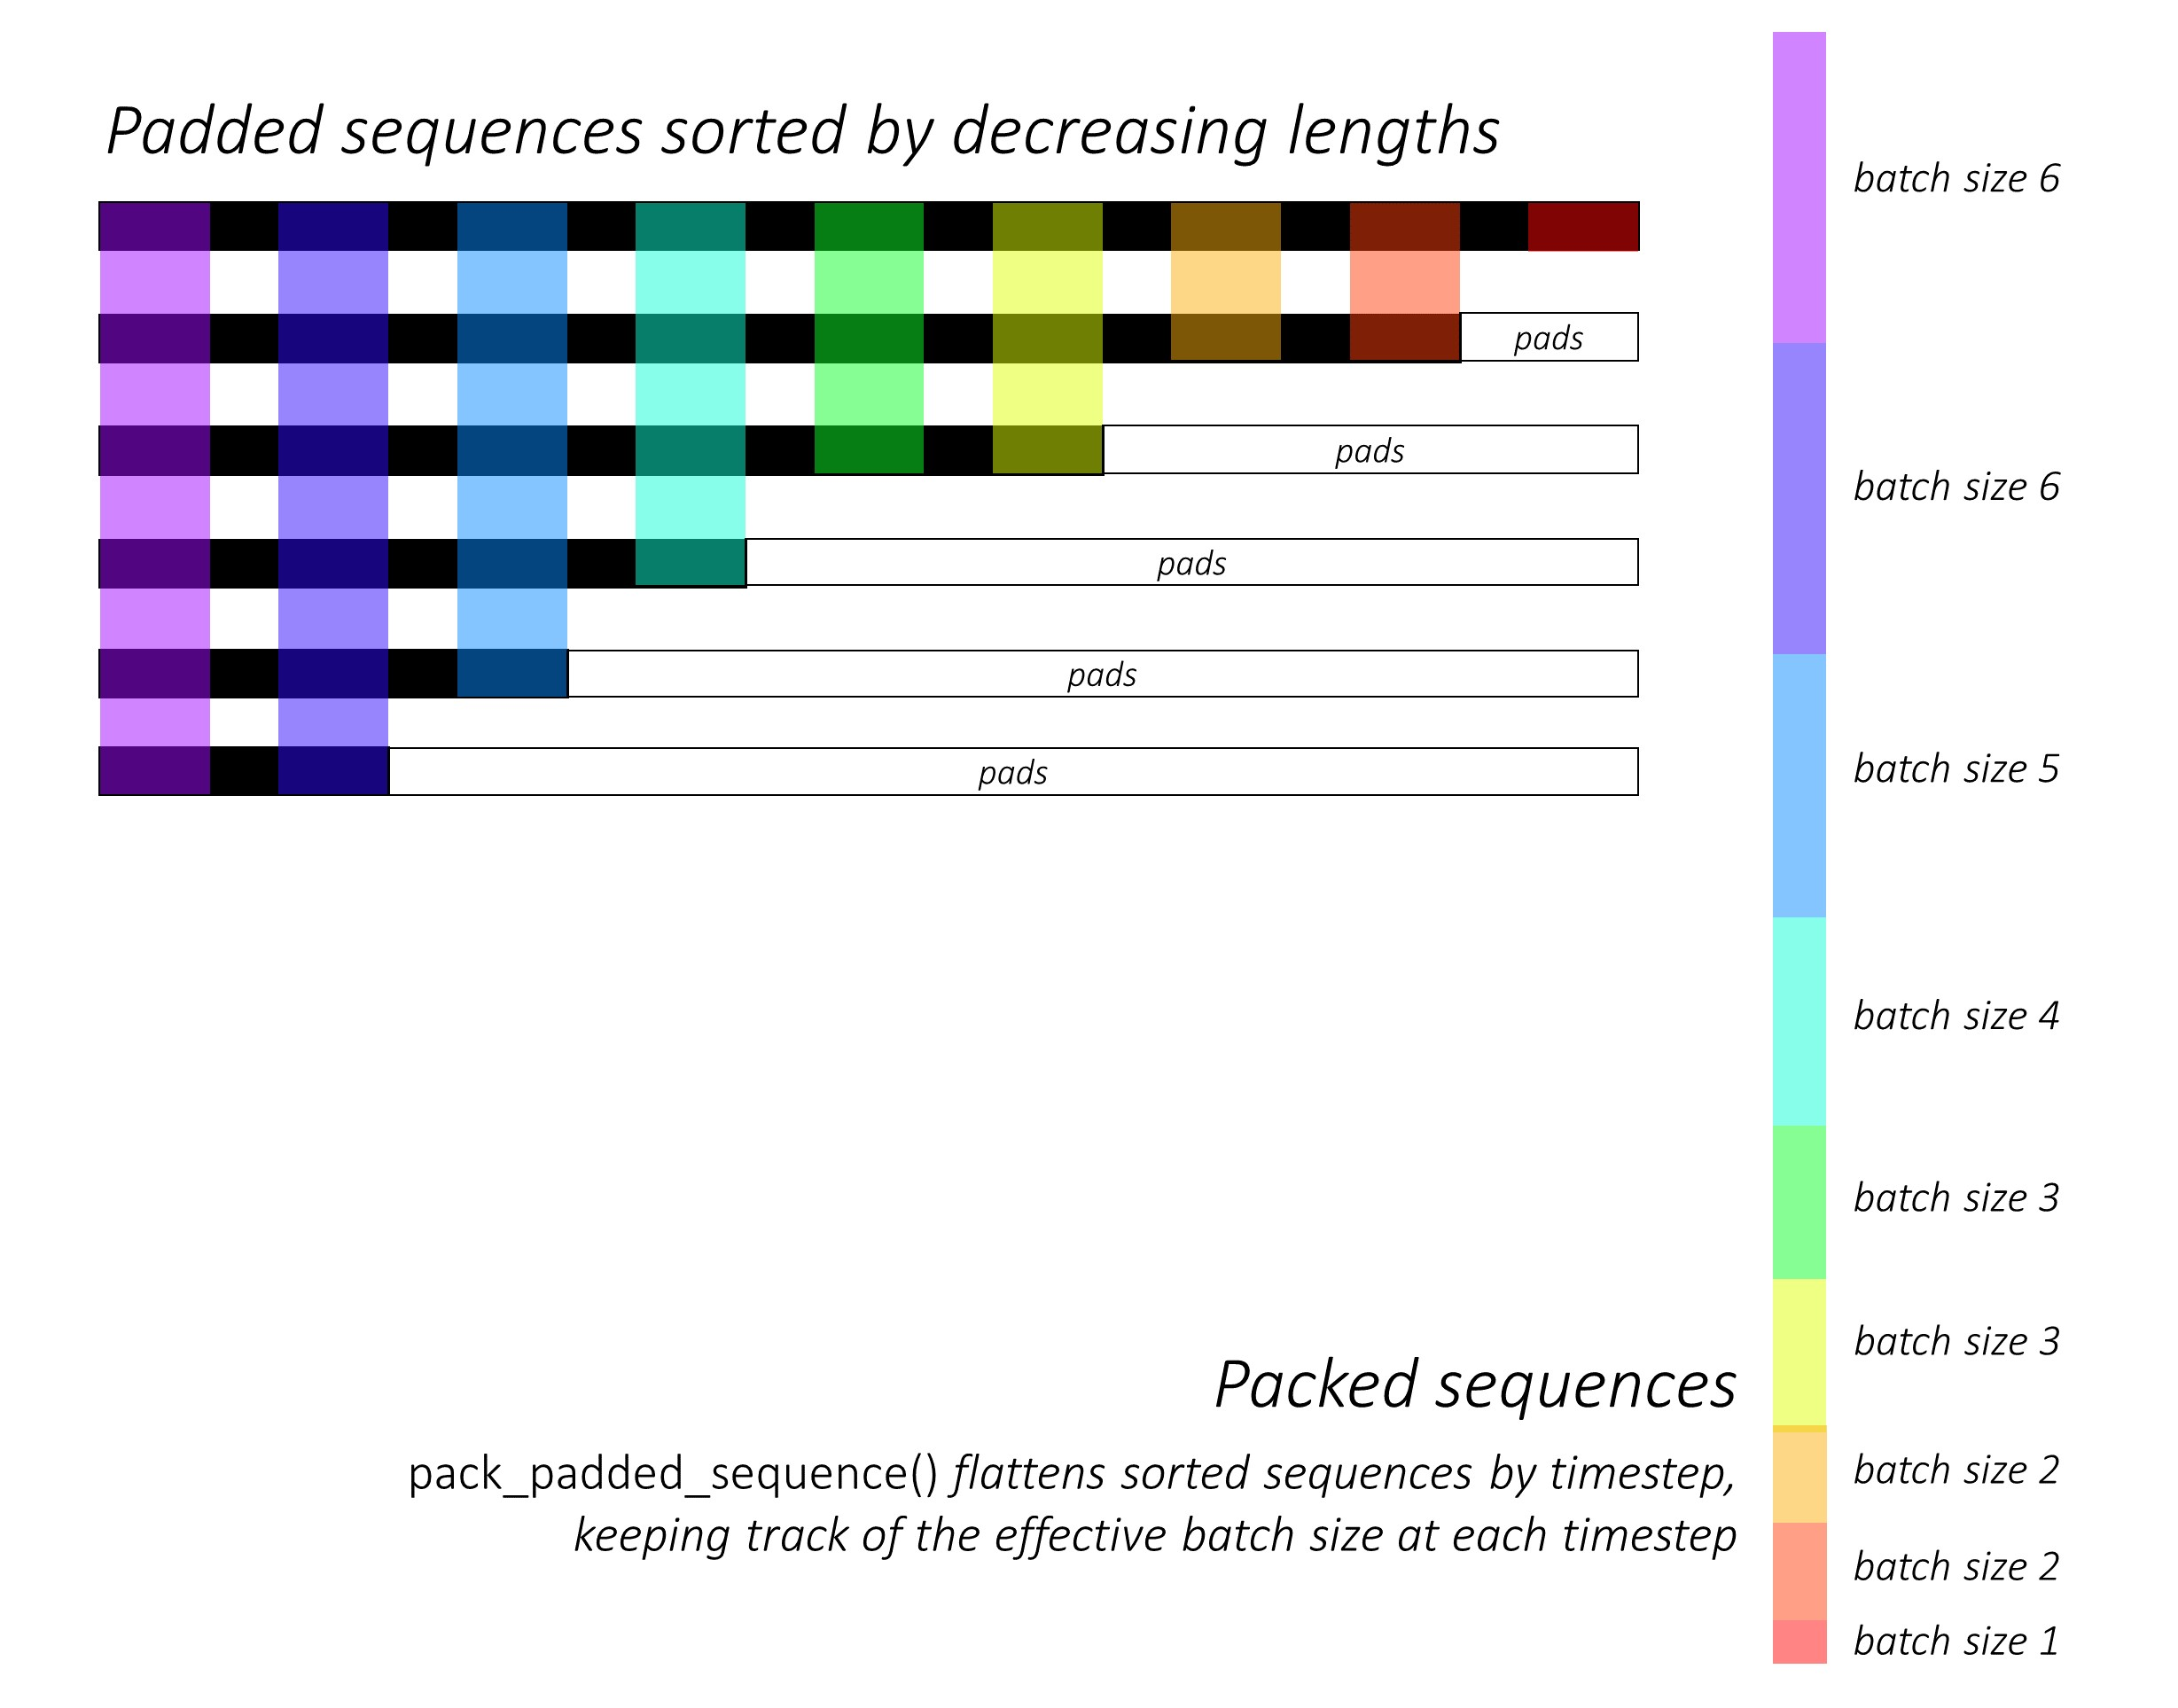

### RNN for Sentiment Analysis
- We will implement a complete model for sentiment classification with an Embedding layer, a RNN layer and a Linear dense layer to get a output in `n_cls` dimension.

#### Embedding of Tokens
- 🎯 **Goal:** Implement `get_embedding_layer` function to embed each token index.

- 💻  **API:** You can refer to [`torch.nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html?highlight=embedding#torch.nn.Embedding)

In [18]:
def get_embedding_layer(vocab_size, embedding_dim, padding_idx = 0):
  # TODO: define embedding_layer with given parameters #
  embedding_layer = ...
  return embedding_layer

##### RNN Layer
- 🎯 **Goal:** Implement the `get_rnn_layer` function with various parameters.

- 💻  **API:** You can refer to [`torch.nn.RNN`](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html?highlight=rnn#torch.nn.RNN) for more details.

In [19]:
def get_rnn_layer(rnn_input_dim,
                  rnn_hidden_dim,
                  num_layers=1,
                  batch_first=True,
                  bidirectional=False,
                  rnn_type='rnn'):
  if rnn_type=='rnn':
    return torch.nn.RNN(input_size=rnn_input_dim,            # The number of expected features in the input x
                      hidden_size=rnn_hidden_dim,            # The size of the hidden state vector h
                      num_layers=num_layers,                 # Number of recurrent layers. E.g., setting num_layers=2 would stack two RNNs together
                      batch_first=batch_first,                 # If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature).
                      bidirectional=bidirectional,           # If True, becomes a bidirectional RNN (you can play around to see what would happen :)
                      )
  elif rnn_type=='gru':
    # TODO: define GRU Layer with given parameters #
    return ...
  else:
    # TODO: define LSTM Layer with given parameters #
    return ...

> **Discussion** 🧐:  What is the dimension and meaning for each dim of the output from RNN layer?
> 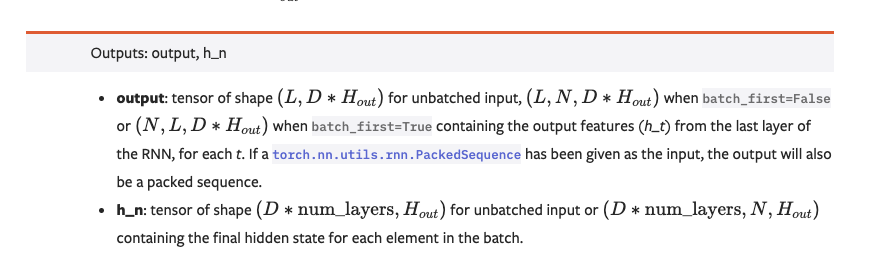

#### Implement `SimpleRNN`
- 🎯 **Goal:** Implement the `SimpleRNN` class with a rnn layer and dense(linear) layer

- 💻  **API:** You can use previous implemented functions and refer to pytorch documentation for more details.

In [39]:
class SimpleRNN(nn.Module):
  def __init__(self,
               vocab,
               embedding_dim,
               hidden_dim,
               num_rnn_layers,
               output_dim,
               bidirectional,
               rnn_type):
      super().__init__()

      # set class features
      self.vocab = vocab
      self.embedding_dim = embedding_dim
      self.hidden_dim = hidden_dim
      self.output_dim = output_dim
      self.num_rnn_layers = num_rnn_layers

      # TODO: define Embedding layer #
      vocab_size = ...
      self.embedding = ...

      # TODO: define RNN layer #
      self.rnn = ...
      ## challenge: Try to set `bidirectional` to True? 

      # TODO: define dense layer #
      self.linear = ...

  def forward(self, x):
    # TODO: get the output follow the process => [embedding->get the last output from rnn->apply dense layer] #
    # you can write multiple lines of codes
    x = ...
    return x

In [21]:
num_class = 2
rnn_model = SimpleRNN(token2idx,
    embedding_dim=128,
    hidden_dim=256,
    num_rnn_layers=2,
    output_dim = num_class,
    bidirectional=False,
    rnn_type="lstm"
)

In [ ]:
# TEST: Check the output and its dimension #
for x,y in train_loader:
  print(x.shape)
  print(y.shape)
  with torch.no_grad():
    pred = rnn_model(x) 
    print(pred.shape)
  break


#### Implement the Training Loop
- 🎯 **Goal:** Implement the `train_epoch` function to train the model on a given dataloader for one epoch.
- After that, given the `eval_epoch`, we will combine them for a complete training loop for multiple epochs.

In [23]:
## TODO: Implement `train_epoch` function for one-epoch training following the instructions ##
def train_epoch(model, train_loader, criterion, optimizer, device):
    # Set the model to training mode. This will turn on layers that would
    # otherwise behave differently during evaluation, such as dropout.
    model.train()
    progress = tqdm(range(len(train_loader)))
    # Record the number of correct predictions and total loss
    running_epoch_loss = []
    running_epoch_acc = []

    for batch_idx, (x, y) in enumerate(train_loader):
      x = x.to(device)
      y = y.to(device)

      # Step 1: Perform the forward pass of the model
      output = ...

      # Step 2: Calculate loss using output and the ground-truth label
      loss = criterion(output, y)

      # Step 3
      # Clear the gradient buffers of optimizer.
      # Otherwise, gradients from the previous batch would be accumulated.
      # [one line of code] 
      ...

      # Step 4: backpropgate loss
      # [one line of code] 
      ...

      # Step 5: update optimizer
      # [one line of code] 
      ...

      # Step 6: get predicted label
      y_pred = ...

      # Step 7: update statistics
      ...

      progress.update()
      progress.set_description(f"Training Loss: {np.mean(running_epoch_loss):.4f} | Accuracy: {np.mean(running_epoch_acc):.4f}")

    # print stats
    epoch_loss = np.mean(running_epoch_loss)
    epoch_acc = np.mean(running_epoch_acc)
    print(f'Training => Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f}')
    return epoch_loss, epoch_acc

In [24]:
# Evaluate the model after each training epoch #
def eval_epoch(model, eval_loader, criterion, device):
  batch_loss = 0
  batch_acc = 0

  model.eval()
  num_correct = 0
  running_epoch_loss = 0.0

  with torch.no_grad():
    for i, (x, y) in enumerate(tqdm(eval_loader, desc='Evaluation '), 0):
        x = x.to(device)
        y = y.to(device)

        # Perform the forward pass of the model
        output = model(x)

        # Compute and print loss
        loss = criterion(output, y)
        y_pred = output.argmax(dim=1)

        num_correct += (y_pred == y).sum().item()
        running_epoch_loss += loss.item()

  eval_loss = running_epoch_loss / len(eval_loader)
  eval_acc = num_correct / len(eval_loader.dataset)

  print(f'Evaluation => Loss: {eval_loss:.4f} | Accuracy: {eval_acc:.4f}')
  return eval_loss, eval_acc

In [32]:
## TODO: Implement Whole Training Process: Combine train_epoch and eval_epoch and save best checkpoint using torch.save(...) ##

def train(model, train_loader, eval_loader, epochs, criterion, optimizer, device):
  train_loss_list = []
  train_acc_list = []
  eval_loss_list = []
  eval_acc_list = []
  best_loss = np.inf

  for epoch in range(epochs):
    print(f'=== Epoch: {epoch} ===')
    ## TODO: trian & eval for one epoch then save if validation loss is less than best_loss ## 
    train_loss, train_acc = ...
    eval_loss, eval_acc = ...

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    eval_loss_list.append(eval_loss)
    eval_acc_list.append(eval_acc)

  return train_loss_list, train_acc_list, eval_loss_list, eval_acc_list


In [ ]:
import torch.optim as optim
EPOCHS = 5
CRITERION = nn.NLLLoss()
OPTIMIZER = optim.Adam(rnn_model.parameters(), lr=5e-4)
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {DEVICE}')
print(rnn_model)

In [ ]:
rnn_model.to(DEVICE)
train_loss_list, train_acc_list, eval_loss_list, eval_acc_list = train(rnn_model, train_loader, test_loader, epochs=EPOCHS, criterion=CRITERION, optimizer=OPTIMIZER, device=DEVICE)

> **Discussion** 🧐: Analyze your training curve. you can try to use visualization tools to see what it looks like ;)

### Inference
After training the model, you can use it to predict the sentiment of a given text.
Since the training time might be long, feel free to download the pretrained-checkpoint [here](https://drive.google.com/file/d/1o79CWC7PmEiIREv-ErOV_CqMgbQUx4Sd/view?usp=share_link), and play around with that.

In [40]:
def load_torch_ckpt(model, ckpt_path):
  ckpt = torch.load(ckpt_path)
  model.load_state_dict(ckpt)
  return model

num_class = 2
rnn_model = SimpleRNN(token2idx,
                      embedding_dim=128,
                      hidden_dim=256,
                      num_rnn_layers=2,
                      output_dim = num_class,
                      bidirectional=False,
                      rnn_type="lstm",
        )
model = load_torch_ckpt(rnn_model, 'ex3_rnn_model.pt') # replace the ckpt_path with where you save the ckpt weights into

In [41]:
def predict(model, input_text):
  model.eval()
  x = tokenize(input_text, token2idx)
  output = model(x.unsqueeze(0), )
  y_pred = output.argmax(dim=1)
  if y_pred.item == 1:
    predict_sent = 'positive'
  else:
    predict_sent = 'negative'
  print(f'Input Text => {input_text}')
  print(f'Predicted Sentiment => {predict_sent}')

In [ ]:
sample_review = "What an empty and lack lustre rendition of the classic novel. I do wish people would stop messing about with classics when they clearly have no idea of the real intention or point of the original. This version is no different. I felt that the Ralph Fiennes version is much worse though as the casting of Juliette brioche as Kathy has got to be the worst casting decision EVER...anyway back to this version. It aims to make the story relevant to a contemporary setting and in a musical style. It succeeds in both but high art it is nit. Throwaway viewing for a rainy day maybe...The direction was average and the editing abysmal. Worse than the old Quincy. Deepak Verma does a great turn as Hindley and is in fact one of Britains wasted talents. The part of Heath was played with great charm and belief and I think that the casting is the strongest point of this project. Although a more talented director would have made better use of the facilities he had. Its clear that he was a director for hire and didn't instill the project with the passion that it deserved."

predict(model, sample_review)

## Task B. Machine Translation with Attention

#### Background: Pitfall of basic RNN structure

In recent years, basic RNN are seldom seen to be used as a mainstream architecture for NLP tasks, especially for NLG (natural language generation) tasks related to long documents. The reason is RNN-based model is not good at process long sequences since it would catastropically forget of the input tokens at the very beginning even if they might include salient semantic information.

Below is the diagram shows the performance of RNN models as the sentence length increases [[Bahdanau et al.,2015](https://arxiv.org/abs/1409.0473)]. The BLEU is used to compare the distance between two sentences, which is an simple and conventional reference-based evaluation metric in a lot of generation tasks. I will refer you to [the original paper](https://aclanthology.org/P02-1040/) for more details about BLEU if you are interested :)

#### Solution: RNN with Attention

To improve upon the simple RNN model we’ll use an attention mechanism in the following section, which lets the decoder learn to focus over all tokens throughout the input sequence according to their importance instead of position.

#### Basic RNN-based Sequence-to-sequence model for Machine Translation
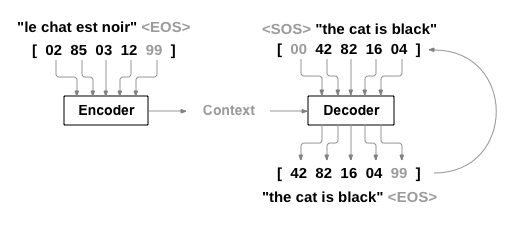

#### Data Preprocessing

In [43]:
# TODO: set data_path to point to the `processed_en_fr.csv` file given as part of the exercise
data_path = ''

In [ ]:
translation_DF = pd.read_csv(data_path)
translation_DF.head()

#### Build Vocabulary
- 🎯 **Goal:** Implement the `Vocab` class with all information about vocabulary dict

- Different from sentiment analysis (many-to-one) task, we need two more special tokens for seq2seq generation task: i) `<sos>`: the start of the sentence; i) `<eos>`: the end of the sentence.


In [45]:
SOS_token = '<sos>'
EOS_token = '<eos>'
PAD_token = '<pad>'
SOS_index = 1
EOS_index = 2
PAD_index = 0

class Vocab:
    def __init__(self):
        self.token2index = {}
        self.token2count = {}
        self.index2token = {0: '<pad>', 1: '<sos>', 2: '<eos>'}
        self.vocab_size = 3  # Count SOS and EOS

    def addWord(self, token):
      # TODO: Add one word into vocabulary dict #
      # you should update `token2index`, `token2count`, `index2token`, `vocab_size`
      if token not in self.token2index:
          ...
      else:
          ...

    def addSentence(self, sentence):
      # TODO: Add each word in the sentence into vocabulary dict #
      for token in sentence.split(' '):
          ...

In [ ]:
# TEST: build vocab for source language (EN) and target language (FR) #
Vocab_EN = Vocab()
Vocab_FR = Vocab()
train_pairs = []

for i, (en, fr) in translation_DF.iterrows():
  Vocab_EN.addSentence(en)
  Vocab_FR.addSentence(fr)
  train_pairs.append((en, fr))

print('Size of Sentence-pairs: ', len(train_pairs))
print('Size of English Vocab: ', Vocab_EN.vocab_size)
print('Size of French Vocab: ', Vocab_FR.vocab_size)

## Encoder
The encoder of a seq2seq network is a RNN which map each input word to a vector and a hidden state, and uses the hidden state for the next input word.


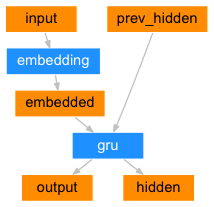

In [47]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [48]:
class EncoderRNN(nn.Module):
    def __init__(self, in_vocab, hidden_dim):
        super(EncoderRNN, self).__init__()
        self.vocab = in_vocab
        self.vocab_size = self.vocab.vocab_size
        self.hidden_dim = hidden_dim
        self.embedding_dim = hidden_dim

        # TODO: define embedding layer corresponding to given `vocab` and `embedding_dim` #
        self.embedding = ...

        # TODO: define a 1-layers, uni-directional RNN with GRU architecture #
        # feel free to use previous implemented function (get_rnn_layer)
        self.rnn = ...

    def forward(self, input, hidden):
        # TODO: calculate the embedded tokens and output from rnn layer #
        embedded = ...
        output, hidden = ...
        return output, hidden

    def initHidden(self):
        return torch.randn(1, 1, self.hidden_dim, device=DEVICE)

#### Decoder
We start with the simple version of decoder. For the basic rnn-based decoder, the `<SOS>` token and the contextual vector (the last output state) from Encoder are input to the decoder as the initial state.
- ⚠️ In this case, since the contextual vector tend to include more information about tokens close to the end of the sentence while forgetting about the tokens at the beginning, the decoder could not get the information from the beginning tokens.

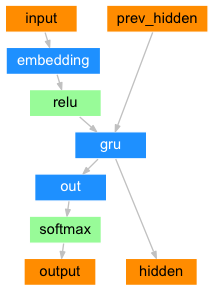

In [49]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_dim, output_dim):
        super(DecoderRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.embedding_dim = hidden_dim

        # TODO: define embedding layer corresponding to given `vocab` and `embedding_dim` #
        # Think about what should be the input dimension here?
        self.embedding = ...
        self.rnn = get_rnn_layer(rnn_input_dim=hidden_dim, 
                               rnn_hidden_dim=hidden_dim, 
                               num_layers=1,
                               bidirectional=False,
                               rnn_type='gru') 
        self.out = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.rnn(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.randn(1, 1, self.hidden_dim, device=DEVICE)

#### Decoder with Attention
Attention mechanism allows the decoder DIRECTLY FOCUS ON EACH TOKENS by calculating ***attention weights*** for every step of the decoder’s own outputs. First we calculate a set of attention weights.

The attention score would further multiplied by the encoder output vectors to create a ***weighted combination***. The result (`attn_applied` in the code) indicates the significance of each part of input sequence to the decoder output, and thus help the decoder choose the right output words.

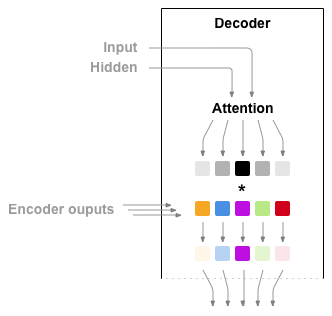

Calculating the attention weights is done with another **feed-forward layer** (`attn`: *using the decoder’s input and hidden state as inputs*). In the real implementation, we have to set the attention matrix length as the maximum target sentence length in the training set.
i.e. ***Sentences of the maximum length will use all the attention weights, while shorter sentences will only use the first few***.

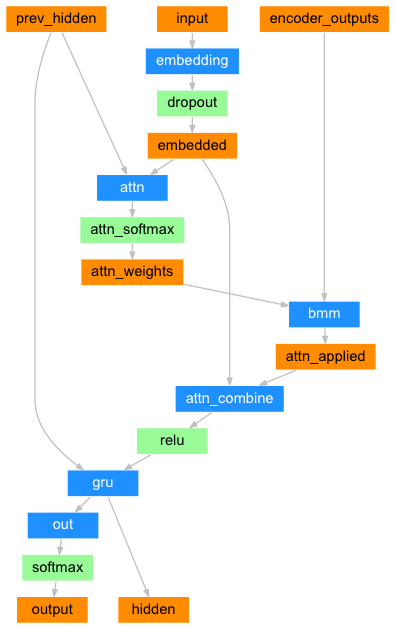

In [50]:
MAX_LENGTH = 10

class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_dim, output_dim, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.dropout_p = dropout_p
        self.max_length = max_length

        # TODO: define embedding layer corresponding to given `vocab` and `embedding_dim` #
        # Think about what should be the input dimension here?
        self.embedding = ...

        # TODO: define attn layer to compute attention weights #
        # Think about what should be the input dimension for attn?
        self.attn = ...

        # TODO: define feed-forward(linear) layer to combine information from attention layer and embedding layer #
        # Refer to the Diagram!
        self.attn_combine = ...
        self.dropout = nn.Dropout(self.dropout_p)
        self.rnn = get_rnn_layer(rnn_input_dim=hidden_dim, 
                               rnn_hidden_dim=hidden_dim, 
                               num_layers=1,
                               bidirectional=False,
                               rnn_type='gru') 
        
        # TODO: define feed-forward(linear) layer to output #
        self.out = ...

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        # TODO: compute attention weights #
        attn_weights = ...
        attn_weights = F.softmax(attn_weights, dim=1)

        # TODO: multiply attention weights and contextual vector #
        attn_applied = ...
        
        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.rnn(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.randn(1, 1, self.hidden_dim, device=DEVICE)

> **Discussion** 🧐: What is the input dimension of nn.Embedding layer for EncoderRNN and DecoderRNN respectively? Are they the same or different? Why?

#### Model Training
Train the Encoder-Decoder model to generate the target-language translation token-by-token

In [51]:
def indexesFromSentence(vocab, sentence):
    return [vocab.token2index[token] for token in sentence.split(' ')]


def tensorFromSentence(vocab, sentence):
    indexes = indexesFromSentence(vocab, sentence)
    indexes.append(EOS_index)
    return torch.tensor(indexes, dtype=torch.long, device=DEVICE).view(-1, 1)


def tensorsFromPair(pair, in_vocab, out_vocab):
    input_tensor = tensorFromSentence(in_vocab, pair[0])
    target_tensor = tensorFromSentence(out_vocab, pair[1])
    return (input_tensor, target_tensor)

In [ ]:
# Tokenize words in source-language & target-language sentences
train_tensor_pairs = [tensorsFromPair(p, Vocab_EN, Vocab_FR) for p in tqdm(train_pairs)]

#### Training Loop
- **(Extra Trick) Teacher Forcing**: For some probability (*teacher_forcing_ratio*), no_matter what's the model's current prediction, the next token in the generated sequence will be from the ground-truth reference.

- Feel free to play with various value of *teacher_forcing_ratio* and compare the translation results :)

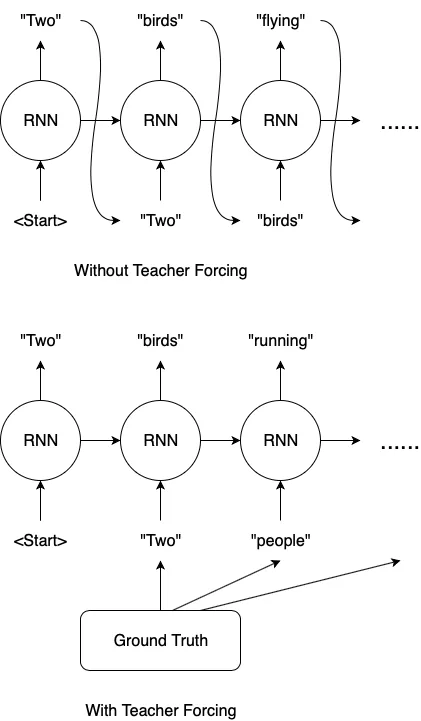

In [53]:
teacher_forcing_ratio = 0.5

def train(input_tensor, 
          target_tensor, 
          encoder, 
          decoder, 
          encoder_optimizer, 
          decoder_optimizer, 
          criterion, 
          max_length=MAX_LENGTH,
          ):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_dim, device=DEVICE)

    loss = 0.0

    for ei in range(input_length):
        # TODO: Get Contextual Vector from Encoder #
        encoder_output, encoder_hidden = ...
        encoder_outputs[ei] = encoder_output[0, 0]
    
    # TODO: Initialize the input and hidden state for decoder #
    decoder_input = ...
    decoder_hidden = ...

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            # TODO: predict next state using decoder #
            decoder_output, decoder_hidden, decoder_attention = ...
            # TODO: calculate loss #
            loss += ...
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            # TODO: predict next state using decoder #
            decoder_output, decoder_hidden, decoder_attention = ...
            # TODO: predict next token with the greatest probability score #
            topv, topi = ...
            decoder_input = topi.squeeze().detach()  # detach from history as input

            # TODO: calculate loss #
            loss += ...

            # TODO: Stop criterion => when to stop generating? #
            if decoder_input.item() == EOS_index:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [54]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [55]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [56]:
# Train for several iterations #
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=500, learning_rate=0.0005):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0   # Reset every plot_every

    encoder_optimizer = optim.AdamW(encoder.parameters(), lr=learning_rate, weight_decay=1e-6)
    decoder_optimizer = optim.AdamW(decoder.parameters(), lr=learning_rate, weight_decay=1e-6)
    criterion = nn.NLLLoss()

    for iter in tqdm(range(1, n_iters + 1), desc='Training '):
        training_pair = train_tensor_pairs[(iter - 1)%len(train_pairs)]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [58]:
# Inference: predict the translation #
def evaluate(encoder, decoder, in_vocab, out_vocab, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(in_vocab, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_dim, device=DEVICE)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_index]], device=DEVICE)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_index:
                decoded_words.append(EOS_token)
                break
            else:
                decoded_words.append(out_vocab.index2token[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [59]:
# Output some generated samples randomly #
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(train_pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, Vocab_EN, Vocab_FR, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [ ]:
# Training! ;) #
hidden_dim = 256
embedding_dim = 256
encoder1 = EncoderRNN(Vocab_EN, hidden_dim, embedding_dim).to(DEVICE)
attn_decoder1 = AttnDecoderRNN(hidden_dim, Vocab_FR.vocab_size, dropout_p=0.1).to(DEVICE)

trainIters(encoder1, attn_decoder1, 5000, print_every=50, plot_every=50)

## Analyze Attention Weights

- Choose one sample sentence, output attention weights for each token using heatmap
- Which pairs of the token have the greatest attention weight?

In [ ]:
def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=40)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder1, attn_decoder1, Vocab_EN, Vocab_FR, input_sentence)
    print('input =', input_sentence)
    print(input_sentence.split(' '))
    print('output =', ' '.join(output_words))
    attentions = attentions[:len(output_words), :len(input_sentence.split(' '))]
    showAttention(input_sentence, output_words, attentions)

# Test: feel free to try more samples on your own #
evaluateAndShowAttention(train_pairs[10][0])

evaluateAndShowAttention(train_pairs[20][0])

evaluateAndShowAttention(train_pairs[30][0])

evaluateAndShowAttention(train_pairs[40][0])

In [ ]:
evaluateRandomly(encoder1, attn_decoder1)

## Congrats! You can now train a simple machine translator by your own ;)